In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def simple_edge_detection(image_path):
    # Read the image here it is simple
    img = Image.open(image_path).convert('L')  # Convert to grayscale
    img_array = np.array(img)

    # Define simple edge detection kernels
    kernel_x = np.array([[-1, 0, 1],
                         [-2, 0, 2],
                         [-1, 0, 1]])

    kernel_y = np.array([[-1, -2, -1],
                         [0, 0, 0],
                         [1, 2, 1]])

    # Apply convolutions - u know this i have taught u this
    edges_x = np.abs(np.convolve(img_array.flatten(), kernel_x.flatten(), mode='same').reshape(img_array.shape))
    edges_y = np.abs(np.convolve(img_array.flatten(), kernel_y.flatten(), mode='same').reshape(img_array.shape))

    # Combine edges - imp
    edges = np.sqrt(edges_x**2 + edges_y**2)

    # Normalize for display - simple
    edges = (edges - edges.min()) / (edges.max() - edges.min()) * 255

    # Display results - u can do this
    plt.figure(figsize=(12, 4))

    plt.subplot(131), plt.imshow(img_array, cmap='gray')
    plt.title('Original Image'), plt.axis('off')

    plt.subplot(132), plt.imshow(edges, cmap='gray')
    plt.title('Edge Detection'), plt.axis('off')

    plt.tight_layout()
    plt.show()

# Example usage - driver code
image_path = './IMG_20200428_185444.jpg'  # Replace with the path to your image
simple_edge_detection(image_path)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from scipy.signal import convolve2d

def detect_edges(image_path):
    # Read the image - simple
    img = Image.open(image_path).convert('L')  # Convert to grayscale
    img_array = np.array(img)

    # Define kernels - also called filters my people
    horizontal_kernel = np.array([[-1, -1, -1],
                                  [0, 0, 0],
                                  [1, 1, 1]])

    vertical_kernel = np.array([[-1, 0, 1],
                                [-1, 0, 1],
                                [-1, 0, 1]])

    # Apply convolution using scipy's convolve2d - its a method
    horizontal_edges = convolve2d(img_array, horizontal_kernel, mode='same', boundary='symm')
    vertical_edges = convolve2d(img_array, vertical_kernel, mode='same', boundary='symm')

    # Normalize for display - simplre
    horizontal_edges = (horizontal_edges - horizontal_edges.min()) / (horizontal_edges.max() - horizontal_edges.min())
    vertical_edges = (vertical_edges - vertical_edges.min()) / (vertical_edges.max() - vertical_edges.min())

    return img_array, horizontal_edges, vertical_edges


image_path = './IMG_20200428_185444.jpg'  # Replace with your image path

# Detect edges
original, horizontal, vertical = detect_edges(image_path)

# Display results
plt.figure(figsize=(15, 5))

plt.subplot(131), plt.imshow(original, cmap='gray')
plt.title('Original Image'), plt.axis('off')

plt.subplot(132), plt.imshow(horizontal, cmap='gray')
plt.title('Horizontal Edges'), plt.axis('off')

plt.subplot(133), plt.imshow(vertical, cmap='gray')
plt.title('Vertical Edges'), plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from scipy.signal import convolve2d

def detect_edges(image_path):
    # Read the image
    img = Image.open(image_path).convert('L')  # Convert to grayscale
    img_array = np.array(img)

    # Define vertical edge detection kernel
    vertical_kernel = np.array([[-1, 0, 1],
                                [-1, 0, 1],
                                [-1, 0, 1]])

    # Apply convolution using scipy's convolve2d
    vertical_edges = convolve2d(img_array, vertical_kernel, mode='same', boundary='symm')

    # Normalize for display
    vertical_edges = (vertical_edges - vertical_edges.min()) / (vertical_edges.max() - vertical_edges.min())

    return vertical_edges

def max_pooling(image, pool_size=2):
    # Ensure even dimensions
    h, w = image.shape
    h = h - h % pool_size
    w = w - w % pool_size
    image = image[:h, :w]

    return image.reshape(h//pool_size, pool_size, w//pool_size, pool_size).max(axis=(1, 3))

# Specify the path to your image
image_path = './IMG_20200428_185444.jpg'  # Replace with your image path

# Detect edges
edge_detected = detect_edges(image_path)

# Apply max pooling
max_pooled = max_pooling(edge_detected)

# Display results
plt.figure(figsize=(15, 5))

plt.subplot(121)
plt.imshow(edge_detected, cmap='gray')
plt.title('Vertical Edge Detection')
plt.axis('off')

plt.subplot(122)
plt.imshow(max_pooled, cmap='gray')
plt.title('After Max Pooling')
plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
np.floor(2.3)

In [ ]:
np.ceil(4.5)

In [ ]:
cascading filter

In [ ]:
#here i am loading all imp packages
import numpy as np
from tensorflow.keras import layers, models, callbacks
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
#load my dataset
(train_images,train_labels),(test_images,test_labels) =  tf.keras.datasets.mnist.load_data()

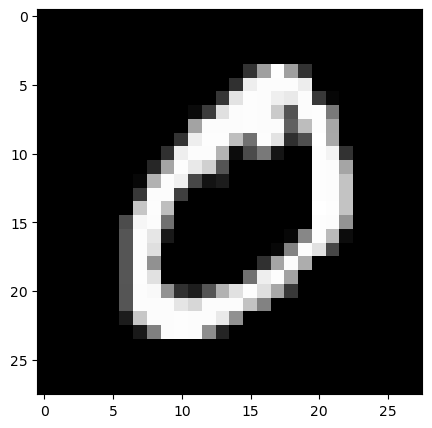

In [ ]:
#visualize the data that you have loaded here
plt.figure(figsize=(5,5))
plt.imshow(train_images[1],cmap='gray')

In [ ]:
# train_images[0]

In [ ]:
#0-255   Normalization   0-1
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

# train_images[0].ndim

In [ ]:
# ms-tomar
# from sklearn.preprocessing import StandardScaler

# # Reshape the data to 2D for StandardScaler
# train_images_reshaped = train_images.reshape(train_images.shape[0], -1)
# test_images_reshaped = test_images.reshape(test_images.shape[0], -1)

# # Initialize StandardScaler and fit it to training data
# scaler = StandardScaler()
# scaler.fit(train_images_reshaped)

# # Transform training and testing data
# train_images_scaled = scaler.transform(train_images_reshaped)
# test_images_scaled = scaler.transform(test_images_reshaped)

# # Reshape the data back to original form
# train_images_scaled = train_images_scaled.reshape(train_images.shape)
# test_images_scaled = test_images_scaled.reshape(test_images.shape)

In [ ]:
# train_images_scaled[0]

In [ ]:
train_images[0].ndim
train_images[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [ ]:
#Reshpe -> 1
train_images = train_images.reshape(-1,28,28,1) #do as is
test_images = test_images.reshape(-1,28,28,1)

In [ ]:
#one hot encoding
train_labels = tf.keras.utils.to_categorical(train_images)
test_labels = tf.keras.utils.to_categorical(test_images)

In [ ]:
# #helper method
# a = tf.keras.utils.to_categorical([0,1,2,3,4,5,6,7,8,9], num_classes=10)
# print(a)

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [ ]:
#data augumentation  - practical

data_augumentation = tf.keras.Sequential([
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])